# notebook to make nicer PPI/PDI/M1H panels for figures

In [1]:
import numpy as np
import seaborn as sns
import shutil
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd

from data_loading import (load_isoform_and_paralog_y2h_data,
                          load_y1h_pdi_data,
                          load_m1h_activation_data,
                          load_valid_isoform_clones,
                          load_annotated_6k_collection)
from plotting import (y2h_ppi_per_tf_gene_plot,
                      y1h_pdi_per_tf_gene_plot,
                      m1h_activation_per_tf_gene_plot)

In [2]:
PAPER_PRESET = {"style": "ticks", "font": "Helvetica", "context": "paper", 
                "rc": {"font.size":10,"axes.titlesize":10,
                       "axes.labelsize":10, 'axes.linewidth':0.5,
                       "legend.fontsize":10, "xtick.labelsize":10,
                       "ytick.labelsize":10, "xtick.major.size": 3.0,
                       "ytick.major.size": 3.0, "axes.edgecolor": "black",
                       "xtick.major.pad": 3.0, "ytick.major.pad": 3.0}}
PAPER_FONTSIZE = 10

In [3]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [4]:
y2h = load_isoform_and_paralog_y2h_data(add_missing_data=True)
y1h = load_y1h_pdi_data(add_missing_data=True)
m1h = load_m1h_activation_data(add_missing_data=True)
isoforms = load_valid_isoform_clones()
y2h = y2h.loc[y2h['ad_clone_acc'].isin(isoforms['clone_acc']).values, :]
y1h = y1h.loc[y1h['unique_acc'].isin(isoforms['clone_acc']).values, :]
m1h = m1h.loc[m1h['clone_acc'].isin(isoforms['clone_acc'].values), :]

tfs = load_annotated_6k_collection()

reading from cache


In [5]:
len([orf for tf in tfs.values() for orf in tf.orfs])

1376

## PDIs

In [6]:
# gene_name = "PKNOX1"

# tf = tfs[gene_name]
# fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.0))
# y1h_pdi_per_tf_gene_plot(gene_name, data=y1h, ax=ax)
# plt.savefig('../figures/{}_y1h-profile.pdf'.format(gene_name), bbox_inches='tight')

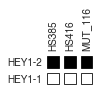

In [9]:
gene_name = "HEY1"

tf = tfs[gene_name]
fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.3))
y1h_pdi_per_tf_gene_plot(gene_name, data=y1h, ax=ax, iso_order=["HEY1-2", "HEY1-1"])
plt.savefig('../figures/{}_y1h-profile.pdf'.format(gene_name), bbox_inches='tight')

In [11]:
# gene_name = "GRHL3"

# tf = tfs[gene_name]
# fig, ax = plt.subplots(1, 1, figsize=(6, 1.0))
# y1h_pdi_per_tf_gene_plot(gene_name, data=y1h, ax=ax)
# plt.savefig('../figures/{}_y1h-profile.pdf'.format(gene_name), bbox_inches='tight')

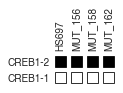

In [15]:
gene_name = "CREB1"

tf = tfs[gene_name]
fig, ax = plt.subplots(1, 1, figsize=(1.6, 1.6))
y1h_pdi_per_tf_gene_plot(gene_name, data=y1h, ax=ax, iso_order=["CREB1-2", "CREB1-1"])
plt.savefig('../figures/{}_y1h-profile.pdf'.format(gene_name), bbox_inches='tight')

## PPIs

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  """


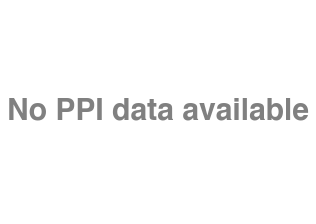

In [17]:
gene_name = "PKNOX1"

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
y2h_ppi_per_tf_gene_plot(tf.name, ax=ax, data=y2h)
plt.savefig('../figures/{}_y2h-profile.pdf'.format(gene_name), bbox_inches='tight')

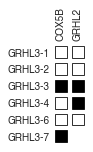

In [20]:
gene_name = "GRHL3"

tf = tfs[gene_name]
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
y2h_ppi_per_tf_gene_plot(tf.name, ax=ax, data=y2h)
plt.savefig('../figures/{}_y2h-profile.pdf'.format(gene_name), bbox_inches='tight')

In [15]:
tfs["PKNOX1"].splicing_categories("PKNOX1-1", "PKNOX1-2")

{'gene': 'PKNOX1',
 'reference isoform': 'PKNOX1-1',
 'alternative isoform': 'PKNOX1-2',
 'alternative N-terminal': False,
 'alternative C-terminal': False,
 'alternative internal exon': False,
 "alternative 5' splice site": False,
 "alternative 3' splice site": True,
 'exon skipping': False,
 'mutually exclusive exons': False,
 'intron retention': False}

## exon diagrams

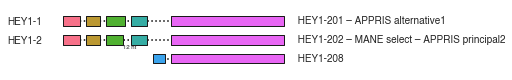

In [22]:
fig, ax = plt.subplots(figsize=(7, 1))

tfs["HEY1"].exon_diagram(ax=ax)
fig.savefig("../figures/HEY1_exon_diagram.pdf", bbox_inches="tight", dpi="figure")

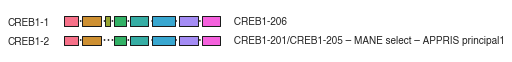

In [25]:
fig, ax = plt.subplots(figsize=(7, 0.75))

tfs["CREB1"].exon_diagram(ax=ax)
fig.savefig("../figures/CREB1_exon_diagram.pdf", bbox_inches="tight", dpi="figure")

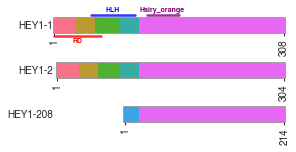

In [23]:
fig, ax = plt.subplots(figsize=(4, 2))

tfs["HEY1"].protein_diagram(only_cloned_isoforms=False, draw_legend=False, ax=ax)
fig.savefig("../figures/HEY1_protein_diagram.pdf", bbox_inches="tight", dpi="figure")

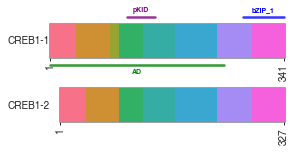

In [26]:
fig, ax = plt.subplots(figsize=(4, 2))

tfs["CREB1"].protein_diagram(only_cloned_isoforms=False, draw_legend=False, ax=ax)
fig.savefig("../figures/CREB1_protein_diagram.pdf", bbox_inches="tight", dpi="figure")